# import 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# load data

In [5]:

import pandas as pd
df = pd.read_csv(r"C:\Users\user\Desktop\Project\alpha-care-insurance\data\machine.csv")
print(df.head())
print(df.info())




  UnderwrittenCoverID\tPolicyID\tTransactionMonth\tIsVATRegistered\tCitizenship\tLegalType\tTitle\tLanguage\tBank\tAccountType\tMaritalStatus\tGender\tCountry\tProvince\tPostalCode\tMainCrestaZone\tSubCrestaZone\tItemType\tmmcode\tVehicleType\tRegistrationYear\tmake\tModel\tCylinders\tcubiccapacity\tkilowatts\tbodytype\tNumberOfDoors\tVehicleIntroDate\tCustomValueEstimate\tAlarmImmobiliser\tTrackingDevice\tCapitalOutstanding\tNewVehicle\tWrittenOff\tRebuilt\tConverted\tCrossBorder\tNumberOfVehiclesInFleet\tSumInsured\tTermFrequency\tCalculatedPremiumPerTerm\tExcessSelected\tCoverCategory\tCoverType\tCoverGroup\tSection\tProduct\tStatutoryClass\tStatutoryRiskType\tTotalPremium\tTotalClaims
0  145249\t12827\t3/1/2015 0:00\tTRUE\tSouth afri...                                                                                                                                                                                                                                                          

# Check Missing Values

In [6]:
df.isnull().sum()

UnderwrittenCoverID\tPolicyID\tTransactionMonth\tIsVATRegistered\tCitizenship\tLegalType\tTitle\tLanguage\tBank\tAccountType\tMaritalStatus\tGender\tCountry\tProvince\tPostalCode\tMainCrestaZone\tSubCrestaZone\tItemType\tmmcode\tVehicleType\tRegistrationYear\tmake\tModel\tCylinders\tcubiccapacity\tkilowatts\tbodytype\tNumberOfDoors\tVehicleIntroDate\tCustomValueEstimate\tAlarmImmobiliser\tTrackingDevice\tCapitalOutstanding\tNewVehicle\tWrittenOff\tRebuilt\tConverted\tCrossBorder\tNumberOfVehiclesInFleet\tSumInsured\tTermFrequency\tCalculatedPremiumPerTerm\tExcessSelected\tCoverCategory\tCoverType\tCoverGroup\tSection\tProduct\tStatutoryClass\tStatutoryRiskType\tTotalPremium\tTotalClaims    0
dtype: int64

# Clean data

In [7]:

print(df.columns.tolist())

['UnderwrittenCoverID\tPolicyID\tTransactionMonth\tIsVATRegistered\tCitizenship\tLegalType\tTitle\tLanguage\tBank\tAccountType\tMaritalStatus\tGender\tCountry\tProvince\tPostalCode\tMainCrestaZone\tSubCrestaZone\tItemType\tmmcode\tVehicleType\tRegistrationYear\tmake\tModel\tCylinders\tcubiccapacity\tkilowatts\tbodytype\tNumberOfDoors\tVehicleIntroDate\tCustomValueEstimate\tAlarmImmobiliser\tTrackingDevice\tCapitalOutstanding\tNewVehicle\tWrittenOff\tRebuilt\tConverted\tCrossBorder\tNumberOfVehiclesInFleet\tSumInsured\tTermFrequency\tCalculatedPremiumPerTerm\tExcessSelected\tCoverCategory\tCoverType\tCoverGroup\tSection\tProduct\tStatutoryClass\tStatutoryRiskType\tTotalPremium\tTotalClaims']


# Univariate Analysis

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = r"C:\Users\user\Desktop\Project\alpha-care-insurance\data\machine.csv"
df = pd.read_csv(file_path, sep="\t", engine="python")
print("Columns:", df.columns.tolist())


In [17]:
df.columns = df.columns.str.strip().str.replace('\n','').str.replace('\r','').str.replace(' ', '_')
print("Columns:", df.columns.tolist())
df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'], errors='coerce')
df = df.dropna(subset=['TransactionMonth'])

monthly = df.groupby(df['TransactionMonth'].dt.to_period('M')).agg({
    "TotalClaims": "sum",
    "TotalPremium": "sum"
}).reset_index()

monthly['TransactionMonth'] = monthly['TransactionMonth'].dt.to_timestamp()

Columns: ['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth', 'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language', 'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province', 'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode', 'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders', 'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors', 'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser', 'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff', 'Rebuilt', 'Converted', 'CrossBorder', 'NumberOfVehiclesInFleet', 'SumInsured', 'TermFrequency', 'CalculatedPremiumPerTerm', 'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section', 'Product', 'StatutoryClass', 'StatutoryRiskType', 'TotalPremium', 'TotalClaims', 'LossRatio']


# Plot Distributions

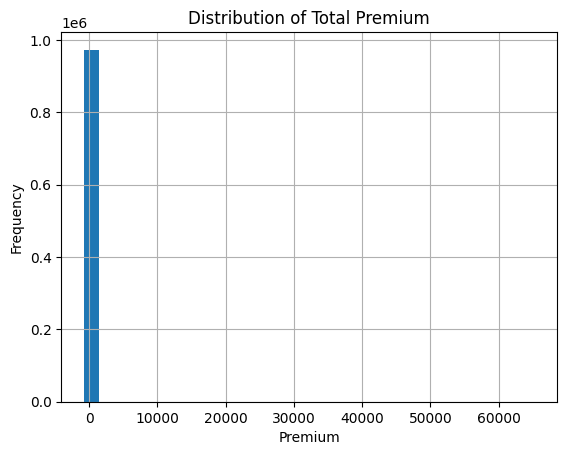

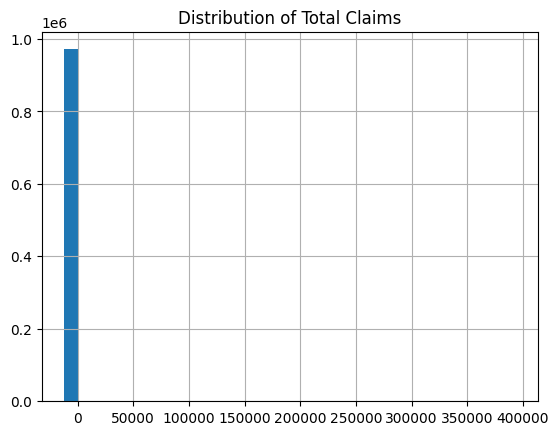

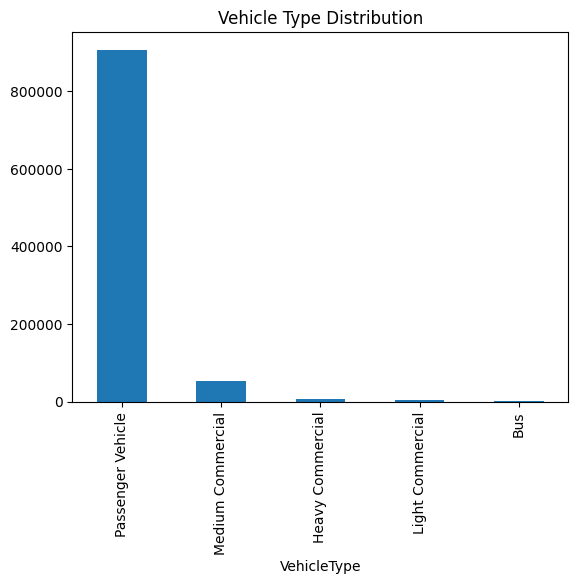

In [12]:
import matplotlib.pyplot as plt
df['TotalPremium'].hist(bins=30)
plt.title("Distribution of Total Premium")
plt.xlabel("Premium")
plt.ylabel("Frequency")
plt.show()
df['TotalClaims'].hist(bins=30)
plt.title("Distribution of Total Claims")
plt.show()
df['VehicleType'].value_counts().plot(kind='bar')
plt.title("Vehicle Type Distribution")
plt.show()


# Bivariate & Multivariate Analysis

# 1. Loss Ratio

In [13]:
df['LossRatio'] = df['TotalClaims'] / df['TotalPremium']
df.groupby('Province')['LossRatio'].mean().sort_values()
df.groupby('Gender')['LossRatio'].mean()
df.groupby('VehicleType')['LossRatio'].mean()


VehicleType
Bus                       inf
Heavy Commercial          inf
Light Commercial     0.551085
Medium Commercial         inf
Passenger Vehicle         NaN
Name: LossRatio, dtype: float64

# 2. Temporal Trends
VehicleIntroDate

<Figure size 1200x600 with 0 Axes>

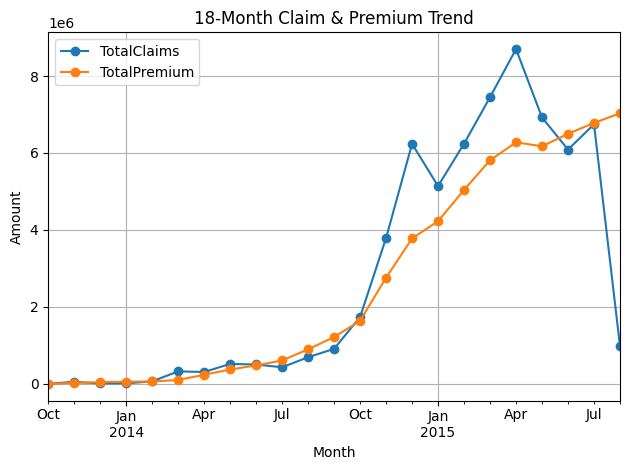

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
# Plot
plt.figure(figsize=(12, 6))
monthly.plot(x='TransactionMonth', y=['TotalClaims', 'TotalPremium'], kind='line', marker='o')
plt.title("18-Month Claim & Premium Trend")
plt.xlabel("Month")
plt.ylabel("Amount")
plt.grid(True)
plt.tight_layout()
plt.show()


# 3. Vehicle Make/Model Performance

In [20]:
vehicle_claims = df.groupby('make')['TotalClaims'].mean().sort_values()
print(vehicle_claims)


make
CITROEN                                  0.000000
CHERY                                    0.000000
FORD                                     0.000000
DAIHATSU                                 0.000000
GEELY                                    0.000000
HINO                                     0.000000
HUMMER                                   0.000000
HONDA                                    0.000000
JINBEI                                   0.000000
KIA                                      0.000000
LEXUS                                    0.000000
MAHINDRA                                 0.000000
PROTON                                   0.000000
RENAULT                                  0.000000
PEUGEOT                                  0.000000
OPEL                                     0.000000
TATA                                     0.000000
VOLVO                                    0.000000
SCANIA                                   0.000000
FOTON                                    3.48

#  Plot top 10 vehicle makes by average claims

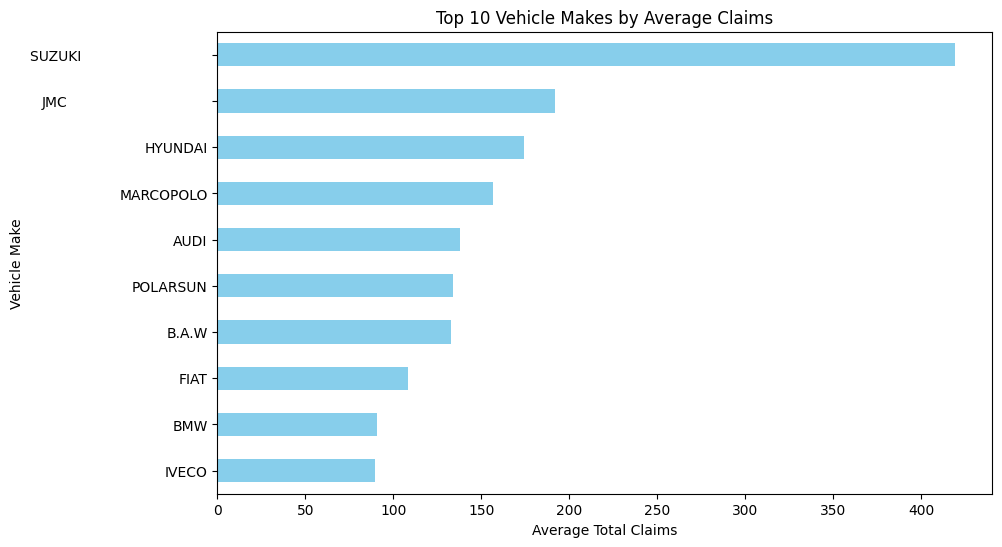

In [ ]:

vehicle_claims.tail(10).plot(kind='barh', figsize=(10,6), color='skyblue')
plt.title("Top 10 Vehicle Makes by Average Claims")
plt.xlabel("Average Total Claims")
plt.ylabel("Vehicle Make")
plt.show()
